In [1]:
def rejection(x_s1, y_s1, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma):
    # get the difference between the values predicted by the model and the actual bp-rp values
    for j in range(1):
        diff = []
        model = np.polyfit(x_s1, y_s1, 10)
        predict = np.poly1d(model)
        predicted = np.arange(len(x_s1), dtype=float)
        for i in range(len(np.array(x_s1))):
            predicted[i] = predict(np.array(x_s1)[i])

        # get the difference between the values predicted by the model and the actual bp-rp values
        diff = y_s1 - predicted

        #get the standard deviation of the differences
        sigma = []
        precision = 10*(10**(-3))
        for n in range(len(x_s1)):
            if x_s1[n] <13:
                precision = 2*(10**(-3))
            elif x_s1[n] < 18:
                precision = 10*(10**(-3))
            else:
                precision = 200*(10**(-3))
            sigma.append(np.sqrt(2*precision**2))
        sigma = np.array(sigma)
        x_filtered = []
        y_filtered = []
        for k in range(len(diff)):
            if diff[k] >= 5*sigma[k]:
                outliers_5sigma.append(x_s1[k])
                y_5sigma.append(y_s1[k])
    
         #   elif diff[k] >= 2*sigma[k]:
         #       outliers_2sigma.append(x_s1[k])
         #       y_2sigma.append(y_s1[k])
            else:
                x_filtered.append(x_s1[k])
                y_filtered.append(y_s1[k])
        x_s1 = x_filtered
        y_s1 = y_filtered
    outliers_5sigma = np.array(outliers_5sigma)
    outliers_2sigma = np.array(outliers_2sigma)
        
    return x_s1, y_s1,outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma, predict



In [2]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with fits.open('NearbyClustersGaia_GALEX_SDSS_Skymapper_2MASS_WISE_ASASSN.fits') as hdu:
    asn_table = Table(hdu[1].data)
df = asn_table.to_pandas()
df_Ple = df[(df['Cluster']=='Pleiades')]

In [4]:
df_Ple.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)

<ipython-input-4-5e75a2092003>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ple.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)


In [5]:
x = np.array(df_Ple['gmag'])
y = np.array(df_Ple['bpmag']- df_Ple['rpmag'])
x_s1 = []
y_s1=[]
for i in range(len(x)):
#    if (13<=x[i]):
        x_s1.append(x[i])
        y_s1.append(y[i])

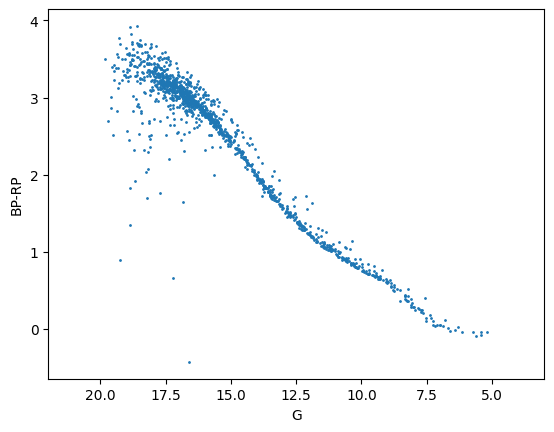

In [6]:
plt.scatter(x, y, s = 1)
plt.xlim(22,3)
plt.xlabel('G')
plt.ylabel('BP-RP')
plt.show()

In [7]:
    # Extract the outliers
    outliers_5sigma = [] #outliers outside of the 2 sigma value
    y_5sigma = [] # corresponding bp-rp values
    outliers_2sigma = [] #outliers outside of the 1.5 sigma value
    y_2sigma = [] # corresponding bp-rp values

In [8]:
x_s1, y_s1, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma, predict1 = rejection(x_s1, y_s1, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma)

<ipython-input-8-ad0eb92d44b5>:1: RankWarning: Polyfit may be poorly conditioned
  x_s1, y_s1, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma, predict1 = rejection(x_s1, y_s1, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma)


In [9]:
x_lin_reg1 = range(3, 21)
y_lin_reg1 = predict1(x_lin_reg1)

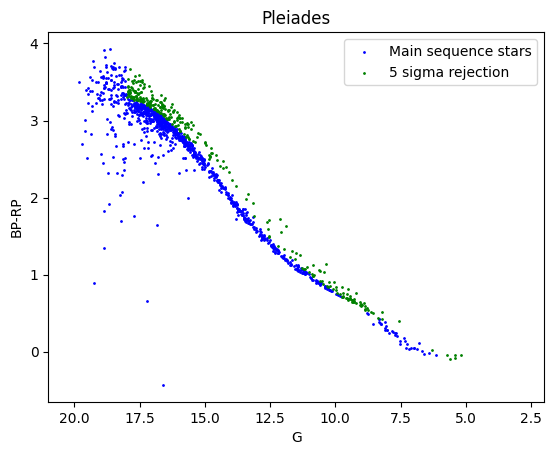

In [10]:
# plot the good values alongside the rejected values and the fitted line
plt.xlim(21,2)
plt.scatter(x_s1, y_s1, c = 'b', label = 'Main sequence stars', s = 1)
plt.scatter(outliers_5sigma, y_5sigma, c = 'g', label = '5 sigma rejection', s=1)
#plt.scatter(outliers_2sigma, y_2sigma, c = 'm',label = '2 sigma rejection', s=1)
plt.xlabel('G')
plt.ylabel('BP-RP')
#plt.plot(x_lin_reg1, y_lin_reg1, c = 'r', label='Fitted line1')
plt.title('Pleiades')
plt.legend()
plt.show()